<h1>Introduction</h1>

In this module, we will learn the classification task - one of the two main supervised tasks that are introduced in this course.

In brief, classification means we have input data, let's call it X, and label data, y, which is classes instead of number. The task is to predict y based on X. There are various machine learning models for this task however we will discuss them later on. The current focus is on understanding the task, and the evaluation measurements for a classification model.

<h3>The CIFAR-10 Dataset</h3>

We will use a small sample of the CIFAR-10 dataset. This is a labeled image dataset -- each row in our data is one image, and the label is the name of the main object in the image. The data has 10 types of objects (hence the name CIFAR-10). 

We do not have to worry about processing image data. This data has been processed to be ready to used in sklearn models. Nevertheless, the transformation of image data into tabular data is not too complicated, we usually can just "flatten" them. Flattening means to concatenate all the channels/rows of pixels in the image into one single row.

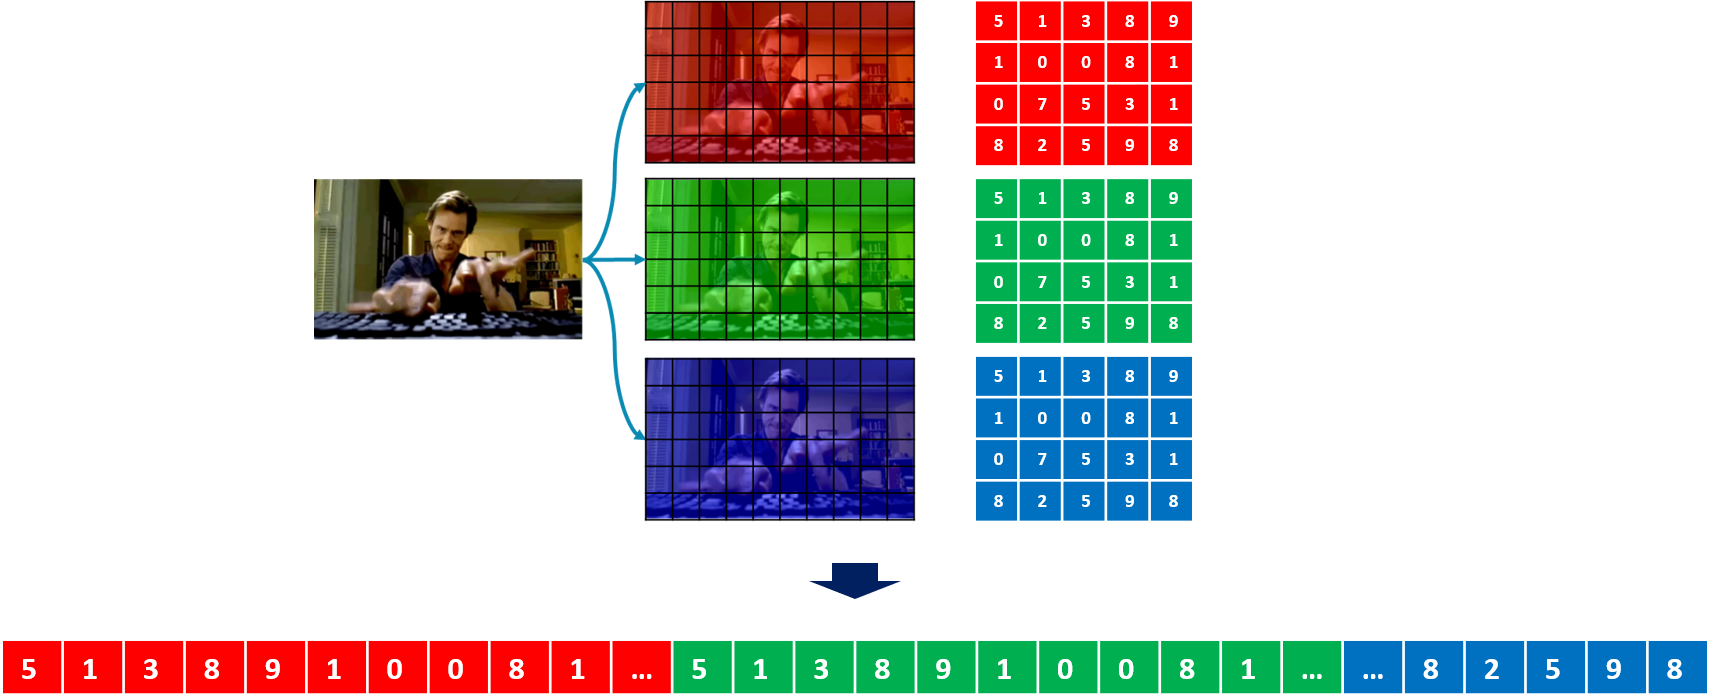

The data in this example is already flattened and saved in numpy format. First, we will load the data. The images and labels are saved separately as numpy arrays. We use numpy.loadtxt() in this case.
<h3> Explore the Data </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.loadtxt('data_X.np').astype(np.uint8)
y = np.loadtxt('data_y.np').astype(np.uint8)
X, y

(array([[117, 127, 136, ...,  80,  84,  78],
        [231, 230, 229, ..., 221, 220, 221],
        [255, 252, 253, ..., 249, 249, 251],
        ...,
        [ 77,  96,  93, ..., 119,  86,  91],
        [ 85,  28, 102, ..., 141, 145, 158],
        [153, 132, 128, ..., 223, 221, 220]], dtype=uint8),
 array([4, 8, 6, ..., 0, 5, 3], dtype=uint8))

In [53]:
X.shape, y.shape

((2000, 3072), (2000,))

We can transform the flattened image back to the image format to view them. The original image size is 3x32x32 -- three channels (Red Green Blue), 32-pixel wide, 32-pixel high. We also need to reorder the rows and columns so it appears correctly. This is done with reshape() and transpose().

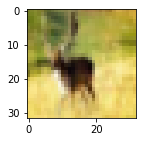

In [3]:
plt.figure(figsize=(2,2))
plt.imshow(X[0].reshape(3,32,32).transpose(1,2,0))

We can randomly sample 100 images and show them with their classes

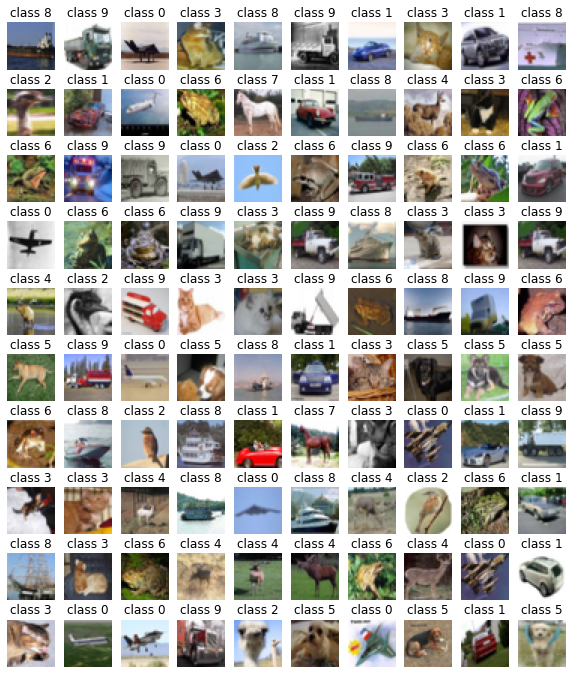

In [4]:
plt.figure(figsize=(10,12))

for i in range(10):
    for j in range(1,11):
        plt.subplot(10,10,i*10+j)
        img_indx = np.random.choice(np.arange(X.shape[0]))
        plt.imshow(X[img_indx].reshape(3,32,32).transpose(1,2,0))
        plt.title('class ' + str(y[img_indx]))
        plt.axis('off')
plt.show()

<h3> Preprocessing </h3>

The data is very clean. We may scale the pixel values to [0,1] if wanted, but that is not totally necessary. 

In [55]:
X_scaled = X/255

In [56]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X_scaled, y, test_size=0.2)
trainX.shape, testX.shape, trainY.shape, testY.shape

((1600, 3072), (400, 3072), (1600,), (400,))

<h2>Binary Classification</h2>

First let get used to the simplest case of classification - binary classification. In this task, the label only has two unique values. We need to do a bit processing on the label to convert it to binary. I will transform all labels to be DOG or NOT DOG. This means, rows with original class 5 will become new class 1, and rows with original class not 5 be come new class 0

In [57]:
trainY_binary = (trainY == 5)*1
testY_binary = (testY == 5)*1
trainY_binary, testY_binary

(array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
     

<h3> Binary Classifier </h3>

The first binary classification model we will be working with is sklearn <b>SGDClassifier</b>. SGDClassifier is actually a set of models, but with the way we are using it with default options like below, it will be a <b>Linear Support Vector Machine</b>.

Like any other sklearn model, training is very simple with the fit() function

In [58]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(trainX, trainY_binary)

SGDClassifier(random_state=42)

we can make prediction for one row, or several rows

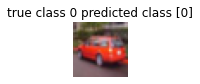

In [59]:
i = 25
yi_pred = sgd_clf.predict(trainX[i].reshape(1,-1))

plt.figure(figsize=(1,1))
plt.imshow(trainX[i].reshape(3,32,32).transpose(1,2,0))
plt.title('true class ' + str(trainY_binary[i]) + ' predicted class ' + str(yi_pred))
plt.axis('off')
plt.show()

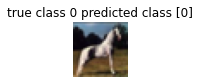

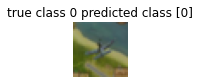

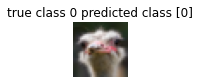

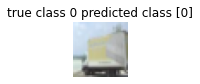

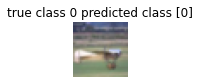

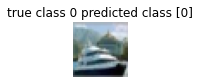

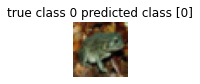

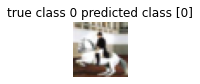

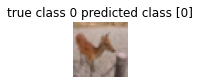

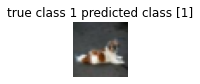

In [60]:
i = 10
j = 20

for indx in range(i, j):
    yi_pred = sgd_clf.predict(trainX[indx].reshape(1,-1))
    plt.figure(figsize=(1,1))
    plt.imshow(trainX[indx].reshape(3,32,32).transpose(1,2,0))
    plt.title('true class ' + str(trainY_binary[indx]) + ' predicted class ' + str(yi_pred))
    plt.axis('off')
    plt.show()

As you can see, prediction made in binary classification for each row will be one among the two classes. This bring us to the first measurement for models in classification - accuracy rate. Accuracy rate represents how much of the data get assigned labels correctly.

Do you remember cross validation? Now we will use cross validation to get the accuracy rate of this model. We will do 5-folds. On average, the accuracy is 0.8836 (88.36% accurate) - seems high, isn't it?

In [61]:
sgd_clf.score(trainX, trainY_binary)

0.94375

<h3>Cross Validation</h3>

Testing the models directly on the data they were trained is not too useful. We can instead use k-fold cross-validation (k-cv). In brieft, in a k-cv process the data will be divided into k portions. Then, for each portion, the models are trained on the other (k-1) portions, and tested on the last ones. This means fitting the model k times. We then use the average errors of all runs to evaluate a model. Example of a dataset split with 3-cv is as below

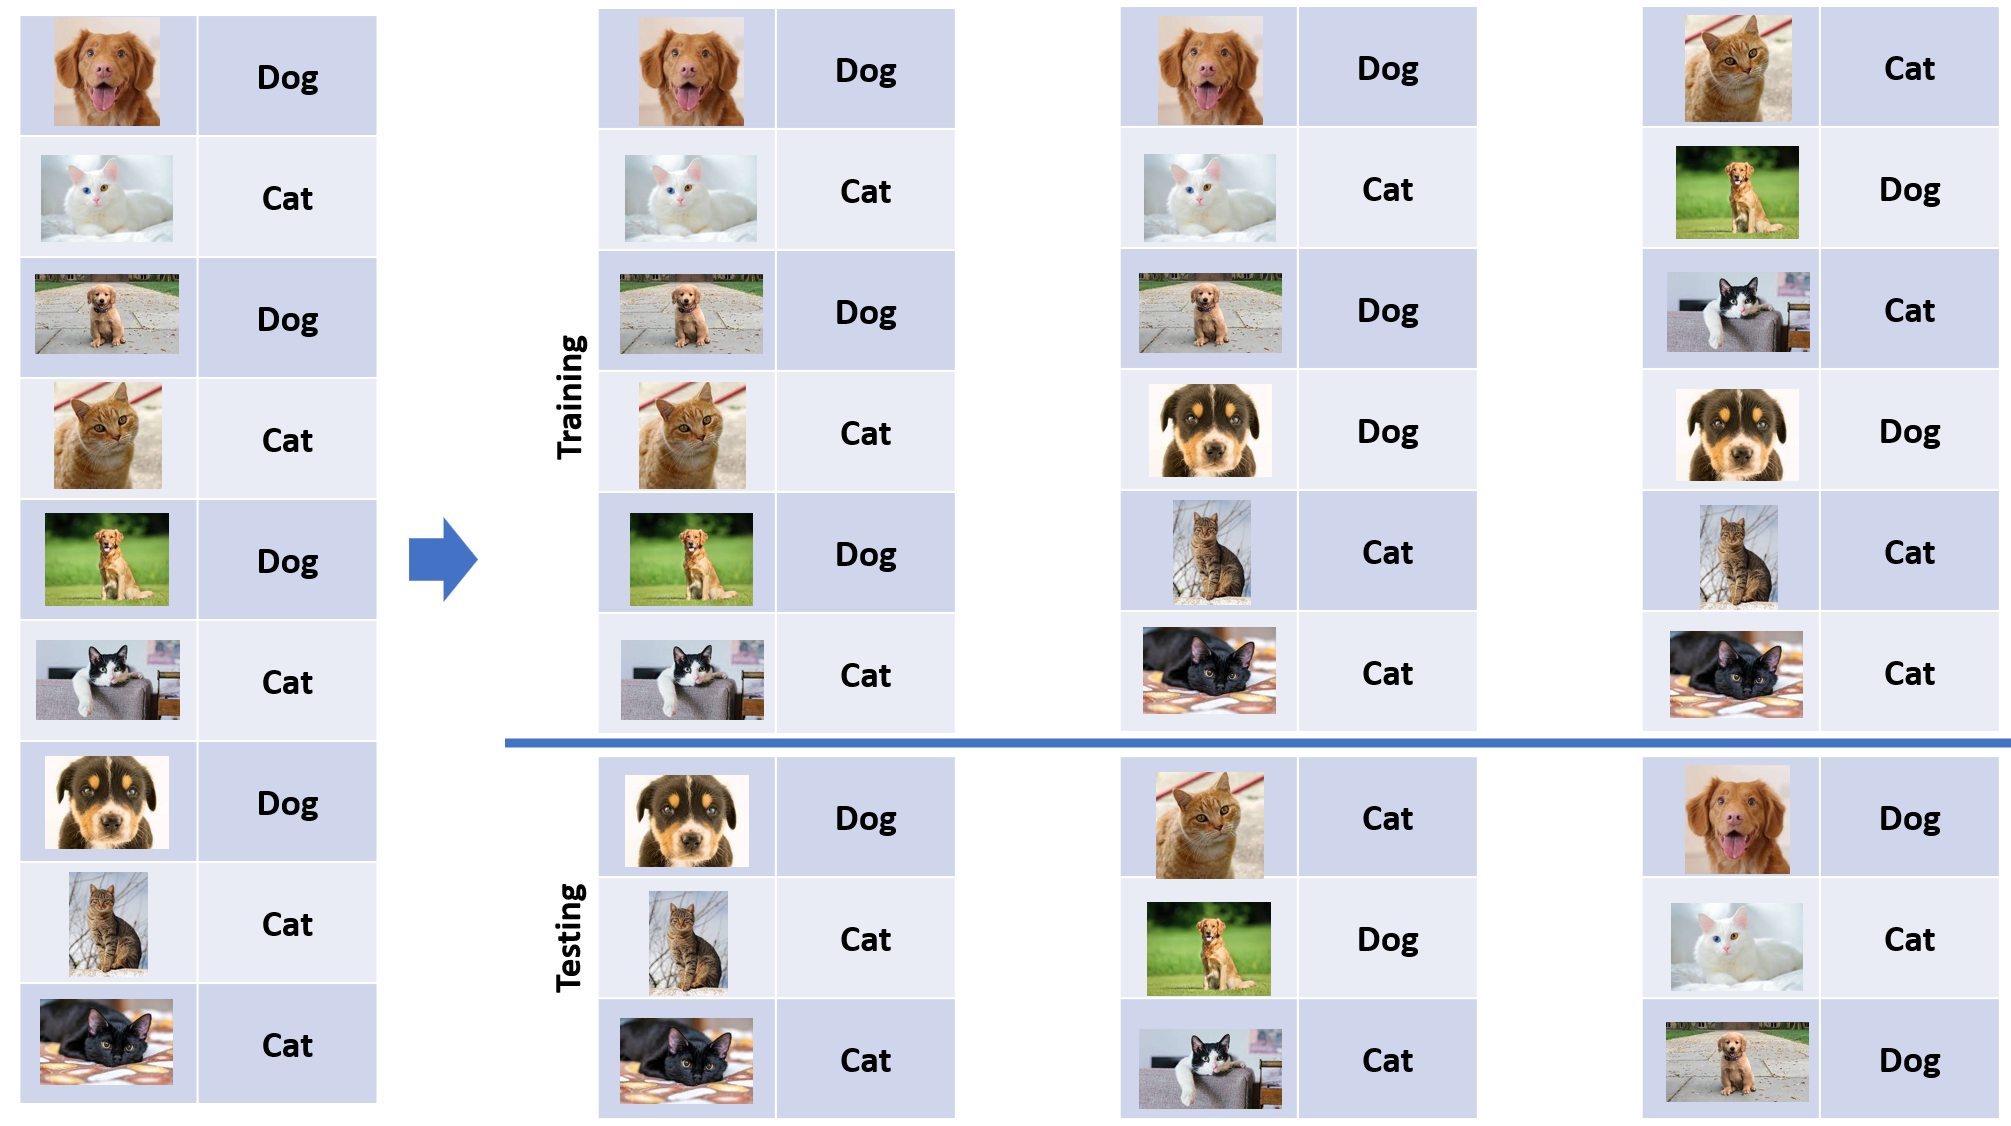

Now let's try applying 5-cv on this data 

In [62]:
from sklearn.model_selection import cross_val_score
sgd_5cv = cross_val_score(sgd_clf, trainX, trainY_binary, cv=5, scoring="accuracy")
print(sgd_5cv.mean())

0.84375


Is 84.375% a good accuracy rate? We need some further information before concluding that. First, let's get the proportion of DOG in this data

In [63]:
np.unique(trainY_binary, return_counts=True)

(array([0, 1]), array([1441,  159], dtype=int64))

In the training dataset, there are 159 over 1600 training images labeled as DOG. This is equivalent to about 10%. In other words, 90% of the data is NOT DOG.

So, even without a model, if we predict everything to be NOT DOG, we will still get 92% accuracy.

We can also write such models using BaseEstimator so it is also a sklearn model

In [64]:
from sklearn.base import BaseEstimator

#in short, the AlwaysFalseClassifier inherits from BaseEstimator
class AlwaysFalseClassifier(BaseEstimator):
    #fit() will not do anything, since we don't train it
    def fit(self, X, y=None):
        pass
    
    #predict returns an array of FALSE that has the same number of rows with input data
    def predict(self, X):
        return np.zeros((X.shape[0], 1), dtype=bool)

Then make prediction

In [65]:
afc = AlwaysFalseClassifier()

afc_5cv = cross_val_score(afc, trainX, trainY_binary, cv=5, scoring="accuracy")
print(afc_5cv.mean())

0.900625


Therefore, it is obvious that accuracy rate is not a good measurement for this case as it is misleading - 90.625% accuracy doesn't mean a good model -- it is a "no model". We will now learn other measurements that are more appropriate.

<h3> Confusion Matrix </h3>

Confusion matrix not only shows how many instances is predicted correctly, it also shows the number of mispredicted instances from 0 to 1 and from 1 to 0. A detailed discussion about confusion matrix (and other measurements) is in https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

In binary classification, the matrix has four values: 
- actual 1, predicted 1: True Positive
- actual 0, predicted 1: False Positive
- actual 1, predicted 0: False Negative
- actual 0, predicted 0: True Negative

To generate a confusion matrix in sklearn, we need the predicted values for the data. We will use the prediction from 5-fold cross validation to avoid overfitting. This is done with <b>cross_val_predict()</b>

In [66]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, trainX, trainY_binary, cv=5)

Then generate the matrix is very easy, we use <b>confusion_matrix()</b> and feed it with the true labels and predicted labels. In the matrix of binary classification, the count of true negatives is at cell [0,0], false negatives is at cell [1,0], true positives is at cell [1,1] and false positives is at cell [0,1].

In [67]:
from sklearn.metrics import confusion_matrix

conf_matrx = confusion_matrix(trainY_binary, y_train_pred)
conf_matrx

array([[1309,  132],
       [ 118,   41]], dtype=int64)

<h3> $precision = \dfrac{TP}{TP+FP}$ </h3>

Precision measures how many rows predicted as positive are indeed positive. We can use precision_score provided by sklearn

In [68]:
from sklearn.metrics import precision_score, recall_score

precision_score(trainY_binary, y_train_pred)

0.23699421965317918

In [69]:
conf_matrx[1,1] / (conf_matrx[1,1] + conf_matrx[0,1])

0.23699421965317918

<h3> $recall = \dfrac{TP}{TP+FN}$ </h3>

Recall measures how many rows of the TRUE class are correctly predicted. We will use recall_score()

In [70]:
recall_score(trainY_binary, y_train_pred)

0.2578616352201258

In [71]:
conf_matrx[1,1] / (conf_matrx[1,1] + conf_matrx[1,0])

0.2578616352201258

- High recall, low precision: This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

- Low recall, high precision: This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

<h3> $F1=\dfrac{2\times precision \times recall}{precision + recall}$ </h3>

A measurement combined from precision and recall. Higher F1 mean better models. We will use f1_score()

In [72]:
from sklearn.metrics import f1_score
f1_score(trainY_binary, y_train_pred)

0.2469879518072289

Another formular directly from the confusion matrix is

$F1 = \dfrac{TP}{TP + \frac{FP + FN}{2}}$

In [73]:
conf_matrx[1,1] / (conf_matrx[1,1] + (conf_matrx[1,0] + conf_matrx[0,1])/2)

0.2469879518072289

How about the F1 score of the dummy model? It turns out that the dummy model has an F1 score of 0.0 - which correctly shows that it does nothing :)

In [23]:
afc_pred = cross_val_predict(afc, trainX, cv=5)
f1_score(trainY_binary, afc_pred)

0.0

<h3> Precision - Recall Curve </h3>

It is useful to plot a precision - recall curve to have an overall picture of the model performance.

In general, no models output the label 0 or 1 directly. Rather, they output a score value from their decision function, then compare that score to a threshold to decide the label being 0 or 1. 

In our case of the default SGDClassifier (which is a linear Support Vector Machine), the decision function outputs a real score, and the default threshold is 0. Score > 0 means label 1, and < 0 mean label 0 (= 0 is probably so rare that we don't need to care about them). We can get the decision scores with decision_function()

In [74]:
y0_scores = sgd_clf.decision_function(trainX[0:1])
y0_scores

array([3.55396758])

Prediction can be made on different threshold, for example, 0, or -10. Different thresholds may give different predictions

In [75]:
threshold = 0
y_some_digit_pred = (y0_scores > threshold)
y_some_digit_pred

array([ True])

In [78]:
threshold = 10

y_some_digit_pred = (y0_scores > threshold)
y_some_digit_pred

array([False])

So, a different threshold will result in a different precision/recall pair. 

To obtain the precision/recall curve, we will

1. get the predicted decision values of all instances
2. sort them lowest to highest
3. consider each score value as a threshold for labeling 1/0 and obtain the precision/recall pair at that threshold
4. collect the precision/recall pairs of all thresholds
5. plot the precision and recall in a 2D plot, horizontal axis represent recall, and vertical axis represent precision

We don't need to do all those steps manually. Instead, we use the precision_recall_curve() function. A detailed discussion for precision-recall curve can be found in https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/ (you will need to scroll down a bit)

Now we use precision_recall_curve() to obtain all the pairs (and their corresponding threshold)

In [79]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, trainX, trainY_binary, cv=5, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(trainY_binary, y_scores)

Now we can plot the precision-recall curve. In general, the closer the curve to the top-right corner, the better the model

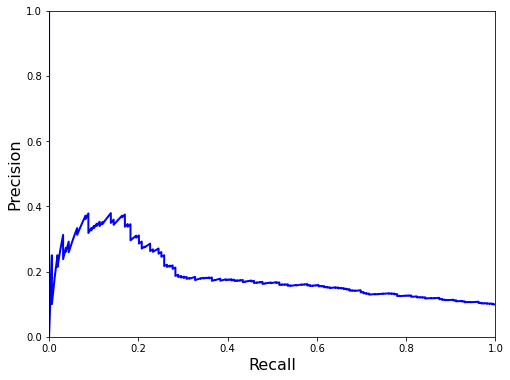

In [80]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

<h3> ROC curves </h3>

ROC curve is another evaluation measurement for binary classification models. It is relatively similar to the precision-recall curve, but use False Positive Rate (FPR) and True Positive Rate (TPR) instead of precision and recall. Constructing this curve also requires setting different score thresholds to compute the FPR-TPR pair and plot them on a 2D figure.

A detailed discussion can be found in https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/ (same page as before)

<h3> $FPR = \dfrac{FP}{FP+TN}$ </h3>

<h3> $TPR = \dfrac{TP}{TP+FN}$ </h3>

Similarly like the precision-recall curve, we won't do the computation ourself but use the sklearn function roc_curve

In [81]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(trainY_binary, y_scores)

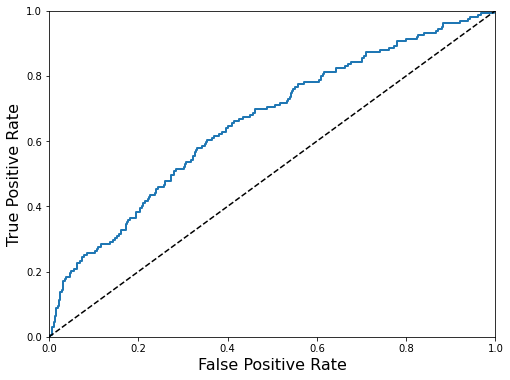

In [82]:
def plot_roc_curve(fpr, tpr, **options):
    plt.plot(fpr, tpr, linewidth=2, **options)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

plt.show()

We can also get the Area Under Curve (AUC) score of the curve. Higher AUC means better models

In [83]:
from sklearn.metrics import roc_auc_score

roc_auc_score(trainY_binary, y_scores)

0.6575229465910727

Now we test our model agains random forest, let's fit a model, then plot both ROC curve in the same plot. Random forest produces a probability of the instance being positive (1) as scores

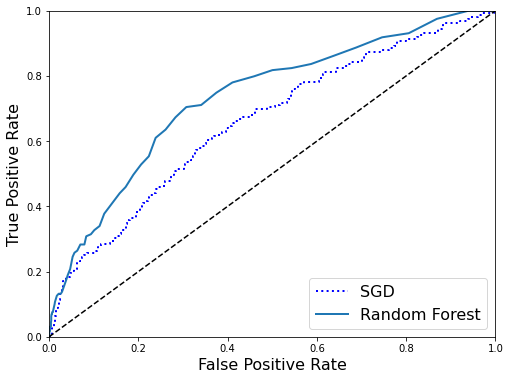

In [84]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, trainX, trainY_binary, cv=5, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(trainY_binary, y_scores_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [85]:
#AUC of random forest
roc_auc_score(trainY_binary, y_scores_forest)

0.7335009318301843

Finally, we can compare the PR Curves of the two models

In [86]:
y_probas_forest = cross_val_predict(forest_clf, trainX, trainY_binary, cv=5, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]
precisions_rf, recalls_rf, thresholds = precision_recall_curve(trainY_binary, y_scores_forest)

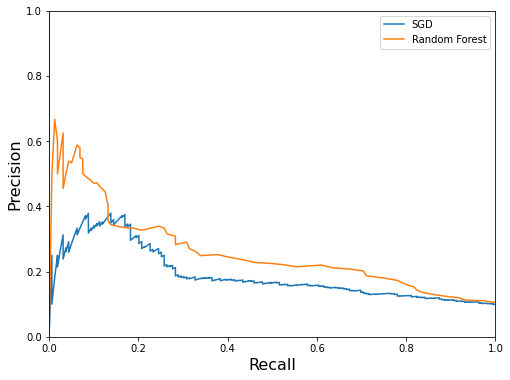

In [87]:
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions)                               #this plot() draws the pr curve for logistic regression
plt.plot(recalls_rf, precisions_rf)                         #this plot() draws the pr curve for random forest
plt.xlabel("Recall", fontsize=16)                           #if you have more models, just add more plot() with their
plt.ylabel("Precision", fontsize=16)                        #respective recall and precision vectors
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(['SGD', 'Random Forest'])                        #this will create the legends. The legends must be in the same
plt.show()                                                  #order as the plot() calls for recalls and precisions

<h1>Multiclass Classification</h1>

A more general case of binary classification. Our target now may have any numbers of unique values instead of being limited to two.

We will return to the original y/trainY/testY instead of their binary versions.

<h3> Modeling </h3>

All sklearn models are usable in both binary and multiclass classification. Furthermore, you <b>do not</b> need to make any modification to the models. For example, the SGD model:

In [88]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(trainX, trainY)

SGDClassifier(random_state=42)

In [89]:
first_row = trainX[0:1]
sgd_clf.predict(first_row)

array([7], dtype=uint8)

Let's first look at the accuracy and f1 score of this model - we can reuse the code from before

In [90]:
from sklearn.model_selection import cross_val_score

accuracy_5cv = cross_val_score(sgd_clf, trainX, trainY, cv=5, scoring="accuracy")
print(accuracy_5cv)
print(accuracy_5cv.mean())

[0.215625 0.25     0.253125 0.25     0.321875]
0.258125


In [98]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

trainY_pred_sgd = cross_val_predict(sgd_clf, trainX, trainY, cv=5)
f1_score(trainY, trainY_pred_sgd, average='weighted')

0.26102050594718984

<h3>Random Forest</h3>

In [92]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(trainX, trainY)
forest_clf.predict(trainX[0:1])

array([3], dtype=uint8)

In [93]:
accuracy_5cv = cross_val_score(forest_clf, trainX, trainY, cv=5, scoring="accuracy")
print(accuracy_5cv)
print(accuracy_5cv.mean())

[0.3625   0.371875 0.3625   0.3625   0.3875  ]
0.369375


In [99]:
trainY_pred_rf = cross_val_predict(forest_clf, trainX, trainY, cv=5)
f1_score(trainY, trainY_pred_rf, average='weighted')

0.3649400902607598

And of course, all the other measurements we learned in binary classification can still be used. We can still use confusion matrix, which is now a 7x7 matrix, because we have 7 classes in the target. In this case, the diagonal of the matrix represents instances that are classified correctly, and other cells represent misclassification.

In [95]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(trainY, trainY_pred_rf)
conf_mx

array([[75,  8, 10,  1,  7,  5,  8,  2, 34, 15],
       [ 6, 46,  2,  7, 10, 14, 10, 11, 10, 37],
       [18,  1, 37, 17, 30,  8, 22,  9, 11,  3],
       [ 8,  3, 11, 34, 17, 30, 28, 11,  8, 13],
       [ 9,  1, 25,  8, 58, 11, 29,  8,  5,  6],
       [ 7,  5, 14, 21, 19, 54, 21, 10,  1,  7],
       [ 4,  4, 17, 19, 25, 15, 71,  4,  1,  6],
       [12,  7, 12, 11, 19, 13, 15, 48,  3, 20],
       [22,  6,  5,  0,  2, 11,  8,  1, 91, 12],
       [13, 17,  4,  9,  4,  1,  5,  8, 22, 77]], dtype=int64)

We can also visualize this matrix for better presentation:

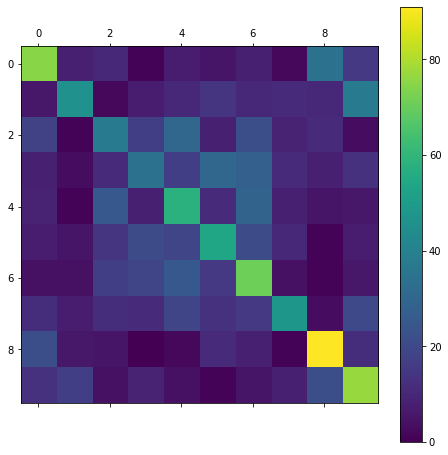

In [96]:
from matplotlib import pyplot as plt

def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plot_confusion_matrix(conf_mx)
plt.show()

We can look at the error rate (how much was misclassified) in pair of classes. The plot below shows the misclassification rate for all pair of classes - for example cell (0,5) shows the rates of CL0 misclassified as CL5, (5,0) represents the rate of CL5 being misclassified as CL0. 

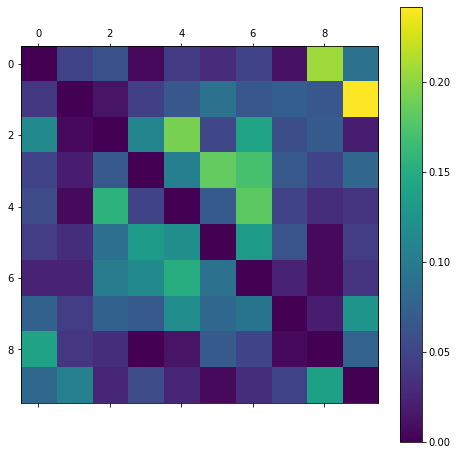

In [97]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plot_confusion_matrix(norm_conf_mx)
plt.show()